In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [4]:
life_expectancy_path = "life_expectancy.csv"

life_expectancy_data = pd.read_csv(life_expectancy_path)

life_expectancy_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
life_exp_df = life_expectancy_data.copy()

type(life_exp_df)

pandas.core.frame.DataFrame

In [6]:
life_exp_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:

reduced_df = life_exp_df[['Country', 'Year', 'Status', 'Life expectancy ',
       'Alcohol', ' BMI ', 'Total expenditure','GDP', 'Population',
       'Income composition of resources', 'Schooling']]

reduced_df.columns = [col.strip() for col in reduced_df.columns]

reduced_df['GDP'].describe()

count      2490.000000
mean       7483.158469
std       14270.169342
min           1.681350
25%         463.935626
50%        1766.947595
75%        5910.806335
max      119172.741800
Name: GDP, dtype: float64

In [8]:
pd.set_option('display.max_rows', None)
reduced_df['Country'].value_counts()

Democratic Republic of the Congo                        16
Liberia                                                 16
Niger                                                   16
Brunei Darussalam                                       16
Paraguay                                                16
Germany                                                 16
Malawi                                                  16
Romania                                                 16
New Zealand                                             16
Nicaragua                                               16
Panama                                                  16
Sierra Leone                                            16
Uruguay                                                 16
Viet Nam                                                16
Tajikistan                                              16
Cambodia                                                16
Mozambique                                              

In [9]:
drop_countries = ['San Marino', 'Marshall Islands', 'Cook Islands', 'Saint Kitts and Nevis', 'Niue', 'Palau', 'Dominica', 'Monaco', 'Nauru',
                  'Tuvalu']

for country in drop_countries:
    reduced_df.drop(reduced_df[reduced_df['Country'] == country].index, inplace=True)
    
reduced_df['Country'].value_counts()  

C:\Users\joshu\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Democratic Republic of the Congo                        16
Uruguay                                                 16
Niger                                                   16
Brunei Darussalam                                       16
Paraguay                                                16
Germany                                                 16
Malawi                                                  16
Romania                                                 16
New Zealand                                             16
Nicaragua                                               16
Panama                                                  16
Liberia                                                 16
Sierra Leone                                            16
Viet Nam                                                16
Tajikistan                                              16
Cambodia                                                16
Mozambique                                              

In [10]:
reduced_df.groupby("Country").count() 

,Year,Status,Life expectancy,Alcohol,BMI,Total expenditure,GDP,Population,Income composition of resources,Schooling
Country,,,,,,,,,,
Afghanistan,16,16,16,16,16,16,16,16,16,16
Albania,16,16,16,16,16,16,16,16,16,16
Algeria,16,16,16,15,16,15,16,16,16,16
Angola,16,16,16,15,16,15,16,16,16,16
Antigua and Barbuda,16,16,16,15,16,15,16,0,16,16
Argentina,16,16,16,15,16,15,16,16,16,16
Armenia,16,16,16,15,16,15,16,16,16,16
Australia,16,16,16,15,16,15,16,16,16,16
Austria,16,16,16,15,16,15,16,16,16,16


In [11]:
reduced_df.groupby("Country")

In [12]:
alc_df = reduced_df
alc_df.loc[alc_df['Country'] == "Sudan"]

,Country,Year,Status,Life expectancy,Alcohol,BMI,Total expenditure,GDP,Population,Income composition of resources,Schooling
2457,Sudan,2015,Developing,64.1,NaN,NaN,NaN,2513.884661,3864783.0,0.488,7.2
2458,Sudan,2014,Developing,63.8,0.01,NaN,8.43,2176.898290,37737913.0,0.485,7.2
2459,Sudan,2013,Developing,63.5,0.01,NaN,8.42,1955.667990,36849918.0,0.478,7.0
2460,Sudan,2012,Developing,63.2,0.01,NaN,8.20,1892.894352,3599192.0,0.468,6.8
2461,Sudan,2011,Developing,62.7,2.12,NaN,8.30,1666.857757,35167314.0,0.463,7.0
2462,Sudan,2010,Developing,62.5,1.77,NaN,7.97,1476.478870,34385963.0,0.461,7.0
2463,Sudan,2009,Developing,62.0,1.99,NaN,8.40,1226.884381,3365619.0,0.456,6.8
2464,Sudan,2008,Developing,61.8,2.01,NaN,8.17,1291.528826,32955496.0,0.444,6.3
2465,Sudan,2007,Developing,61.4,2.01,NaN,4.72,1115.695200,32282526.0,0.440,6.4
2466,Sudan,2006,Developing,61.0,1.90,NaN,3.93,893.879364,316764.0,0.430,6.2


In [13]:
sixteen = []
sixteen = alc_df.groupby("Country")['Alcohol'].count() > 15
sixteen = pd.DataFrame(sixteen)
sixteen

,Alcohol
Country,
Afghanistan,True
Albania,True
Algeria,False
Angola,False
Antigua and Barbuda,False
Argentina,False
Armenia,False
Australia,False
Austria,False


In [14]:
# Dropping South Sudan- No Alcohol Data
alc_df = alc_df.loc[alc_df["Country"] != "South Sudan"]

In [15]:
alc_df.loc[alc_df['Alcohol'].agg('min') > .01]

KeyError: False

In [16]:
# Sorting out to see .01 values and then sorting by mean
alc_df.groupby("Country")['Alcohol'].describe().sort_values('min')

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Afghanistan,16.0,0.014375,0.007274,0.01,0.0100,0.010,0.0200,0.03
Myanmar,15.0,0.351333,0.151510,0.01,0.2800,0.330,0.4050,0.70
Mozambique,15.0,1.266000,0.510571,0.01,1.0850,1.190,1.5100,2.16
Montenegro,14.0,2.584286,3.113059,0.01,0.0100,0.010,5.9725,6.56
Mongolia,15.0,2.354000,1.832632,0.01,0.6600,2.750,3.3500,5.80
Mauritius,15.0,2.906667,1.619791,0.01,2.6600,3.240,4.1100,4.60
Mauritania,15.0,0.013333,0.006172,0.01,0.0100,0.010,0.0150,0.03
Mali,15.0,0.438000,0.224760,0.01,0.4800,0.530,0.5600,0.61
Maldives,15.0,1.407333,0.736812,0.01,1.5300,1.750,1.8300,1.98


In [17]:
# Need to create a dataframe of the top 25 countries (based on mean)
alc_df.groupby('Status')['Alcohol'].mean()

Status
Developed     9.826736
Developing    3.494220
Name: Alcohol, dtype: float64

In [18]:
top25 = alc_df.groupby("Country")['Alcohol'].describe().sort_values('min').tail(50)

In [19]:
top25.loc[top25['count'] > 15]

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Norway,16.0,6.234375,0.366660,5.49,6.0225,6.215,6.5450,6.75
New Zealand,16.0,9.166250,0.257420,8.70,9.0300,9.185,9.3175,9.62
United Kingdom of Great Britain and Northern Ireland,16.0,11.131250,0.641788,10.32,10.6425,10.895,11.6675,12.22


In [20]:
# Getting the top 25 Countries with 15 years of data
# top25 = top25.drop(labels=['New Zealand', "United Kingdom of Great Britain and Northern Ireland", "Norway"], axis=0)
top25 = top25.reset_index()

In [21]:
top25

,Country,count,mean,std,min,25%,50%,75%,max
0,Mexico,15.0,5.114000,0.204024,4.77,4.9150,5.210,5.2800,5.36
1,Belize,15.0,6.252667,0.801770,4.79,5.9350,6.560,6.7100,7.24
2,Uruguay,15.0,6.172667,0.477979,5.11,5.8400,6.210,6.6150,6.76
3,Dominican Republic,15.0,6.030667,0.327359,5.16,5.9250,6.050,6.1650,6.58
4,Panama,15.0,6.212000,0.651879,5.43,5.5550,6.160,6.8800,6.95
5,Norway,16.0,6.234375,0.366660,5.49,6.0225,6.215,6.5450,6.75
6,Malta,15.0,7.130000,1.057781,5.59,6.4700,7.140,7.7900,8.84
7,Kazakhstan,15.0,6.641333,0.513933,5.75,6.3850,6.630,6.8850,7.60
8,Thailand,15.0,6.131333,0.226049,5.88,5.9250,6.140,6.2300,6.56
9,Chile,15.0,6.978000,0.615852,6.06,6.3450,7.200,7.3600,7.93


In [22]:
gdp_mean = alc_df.groupby("Country")['GDP'].agg('mean')
gdp_mean = pd.DataFrame(gdp_mean)

In [23]:
top25 = top25.merge(gdp_mean, left_on="Country", right_index=True)

In [24]:
top25 = top25.dropna(axis='index', how='any')

In [25]:
len(top25)

42

In [26]:
# finding lower bounds
low25 = alc_df.groupby("Country")['Alcohol'].describe().sort_values('min')
low25 = low25.loc[(low25['min'] > .01) & (low25['min'] < 5)]

In [27]:
low25 = low25.merge(gdp_mean, left_on="Country", right_index=True)

In [28]:
low25 = low25.dropna(axis='index', how='any')

In [29]:
low25 = low25.reset_index()

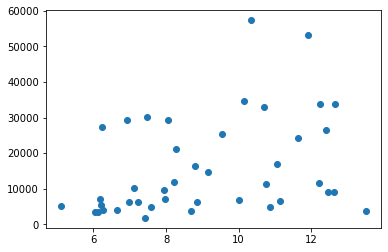

In [30]:



plt.scatter(top25.iloc[:,2], top25.iloc[:,9])


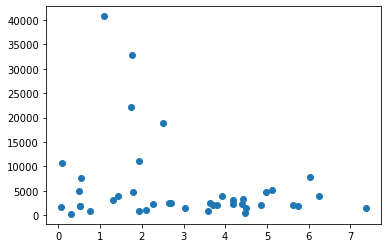

In [31]:
plt.scatter(low25.iloc[:,2], low25.iloc[:,9])

In [32]:
all = top25.append(low25)

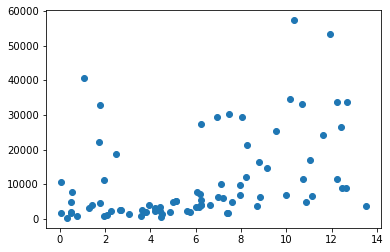

In [33]:
plt.scatter(all.iloc[:,2], all.iloc[:,9])

In [34]:
all.sort_values('GDP', ascending=False)

,Country,count,mean,std,min,25%,50%,75%,max,GDP
33,Switzerland,15.0,10.338000,0.496476,9.61,10.0000,10.240,10.6850,11.26,57362.874601
45,Luxembourg,15.0,11.922000,0.699635,11.02,11.3900,11.750,12.5150,13.14,53257.012741
8,Qatar,15.0,1.081333,0.221258,0.50,1.0550,1.150,1.1900,1.37,40748.444104
32,Australia,15.0,10.155333,0.364885,9.53,9.8550,10.170,10.4150,10.76,34637.565047
42,Ireland,15.0,12.654000,1.262310,10.49,11.6050,13.240,13.5150,14.27,33835.272005
47,Austria,15.0,12.236000,0.408705,11.30,12.0700,12.260,12.4000,13.20,33827.476309
30,Denmark,15.0,10.708000,0.798778,9.26,10.1800,10.990,11.3100,11.69,33067.407916
13,Singapore,16.0,1.762500,0.219530,1.43,1.5875,1.795,1.8525,2.16,32790.105907
10,Iceland,15.0,7.466000,1.031045,6.17,6.7000,7.310,7.9700,10.22,30159.502907
23,Canada,15.0,8.053333,0.294877,7.60,7.7500,8.200,8.3000,8.40,29382.907523


In [35]:
cc = st.pearsonr(all.iloc[:,2], all.iloc[:,9])
cc

(0.42093578591325365, 7.416535483434813e-05)

In [36]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(all.iloc[:,2], all.iloc[:,9])
regress_values = all.iloc[:,2] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x " + str(round(intercept, 2))

(0.42093578591325365, 7.416535483434813e-05)

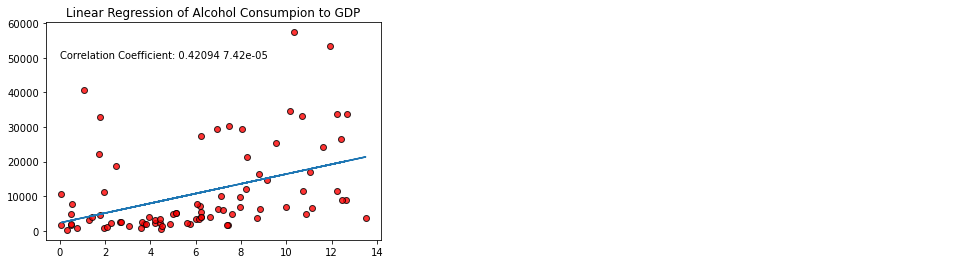

In [37]:
plt.scatter(all.iloc[:,2], all.iloc[:,9], facecolors="red", edgecolors="black", alpha=.8)
plt.plot(all.iloc[:,2], regress_values)
plt.title("Linear Regression of Alcohol Consumpion to GDP")
plt.annotate(line_eq, (35, 20))
plt.annotate(f"Correlation Coefficient: {round(cc[0], 5)} {round(cc[1], 7)}", (0, 50000))
cc

In [38]:
higher_min_countries = (alc_df.groupby("Country")['Alcohol'].describe()['min'] > .01)

Text(5, 30000, 'Correlation Coefficient: -0.24435 0.1236473')

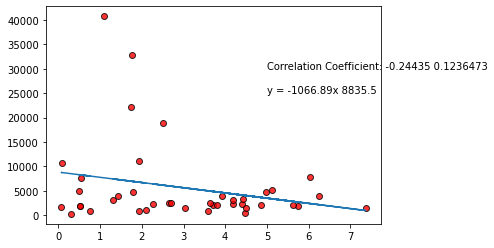

In [39]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(low25.iloc[:,2], low25.iloc[:,9])
regress_values = low25.iloc[:,2] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x " + str(round(intercept, 2))
cc = st.pearsonr(low25.iloc[:,2], low25.iloc[:,9])
plt.scatter(low25.iloc[:,2], low25.iloc[:,9], facecolors="red", edgecolors="black", alpha=.8)
plt.plot(low25.iloc[:,2], regress_values)
plt.annotate(line_eq, (5, 25000))
plt.annotate(f"Correlation Coefficient: {round(cc[0], 5)} {round(cc[1], 7)}", (5, 30000))

Text(5, 45000, 'Correlation Coefficient: 0.35633 0.0205466')

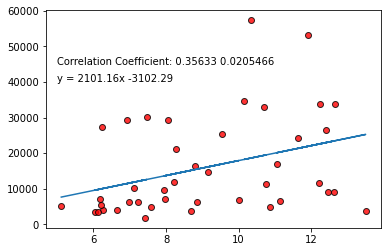

In [40]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(top25.iloc[:,2], top25.iloc[:,9])
regress_values = top25.iloc[:,2] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x " + str(round(intercept, 2))
cc = st.pearsonr(top25.iloc[:,2], top25.iloc[:,9])
plt.scatter(top25.iloc[:,2], top25.iloc[:,9], facecolors="red", edgecolors="black", alpha=.8)
plt.plot(top25.iloc[:,2], regress_values)
plt.annotate(line_eq, (5, 40000))
plt.annotate(f"Correlation Coefficient: {round(cc[0], 5)} {round(cc[1], 7)}", (5, 45000))

In [41]:
sum_table = alc_df.groupby('Country')['Alcohol'].describe()

In [42]:
sum_table = sum_table.merge(alc_df.groupby('Country')['Status'].agg('min'), on='Country')

In [43]:
# Need to run these!
sum_table = sum_table.merge(alc_df.groupby('Country')['Life expectancy'].agg('mean'), on='Country')
sum_table = sum_table.merge(alc_df.groupby('Country')['BMI'].agg('mean'), on='Country')
sum_table = sum_table.merge(alc_df.groupby('Country')['Schooling'].agg('mean'), on='Country')

In [44]:
sum_table.head(10)

,count,mean,std,min,25%,50%,75%,max,Status,Life expectancy,BMI,Schooling
Country,,,,,,,,,,,,
Afghanistan,16.0,0.014375,0.007274,0.01,0.010,0.01,0.020,0.03,Developing,58.19375,15.51875,8.21250
Albania,16.0,4.848750,0.656637,3.66,4.455,4.95,5.325,5.79,Developing,75.15625,49.06875,12.13750
Algeria,15.0,0.406667,0.158099,0.01,0.350,0.45,0.500,0.66,Developing,73.61875,48.74375,12.71250
Angola,15.0,5.740667,2.329903,1.85,3.510,6.35,7.930,8.33,Developing,49.01875,18.01875,8.04375
Antigua and Barbuda,15.0,7.949333,0.580547,7.16,7.395,7.84,8.415,8.93,Developing,75.05625,38.42500,8.84375
Argentina,15.0,7.966667,0.303213,7.53,7.715,7.93,8.220,8.41,Developing,75.15625,54.98125,16.50625
Armenia,15.0,3.702667,0.510692,2.86,3.410,3.91,4.000,4.25,Developing,73.40000,44.70625,11.78750
Australia,15.0,10.155333,0.364885,9.53,9.855,10.17,10.415,10.76,Developed,81.81250,55.86250,20.03750
Austria,15.0,12.236000,0.408705,11.30,12.070,12.26,12.400,13.20,Developed,81.48125,48.28750,15.38750


In [49]:
clean_sum_table = sum_table[['mean', 'min', 'Status_y', 'Life expectancy', 'BMI', 'Schooling']]
clean_sum_table.rename(columns={'Status_y': 'Status', 'mean':'Alc Mean', 'min':'Alc Min'}, inplace=True)
clean_sum_table.reset_index(inplace=True)
clean_sum_table.drop(clean_sum_table.loc[clean_sum_table['min'] == .01].index, inplace=True)
# TODO add dropna
# clean_sum_table.dropna

KeyError: "['Status_y'] not in index"

In [46]:
clean_sum_table

NameError: name 'clean_sum_table' is not defined

In [47]:
def doTheCalculations(comparison, groupby):
    if comparison == 'BMI':
        column = 5
    elif comparison == 'LE':
        column = 4
        comparison = 'Life Expectancy'
    elif comparison == 'SCH':
        column = 6
        comparison = 'Schooling'
    else:
        print("Wrong Selection, run the cell to try again!")
    
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(clean_sum_table.iloc[:,1], clean_sum_table.iloc[:,column])
    regress_values = clean_sum_table.iloc[:,1] * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x " + str(round(intercept, 2))
    cc = st.pearsonr(clean_sum_table.iloc[:,1], clean_sum_table.iloc[:,column])
    plt.scatter(clean_sum_table.iloc[:,1], clean_sum_table.iloc[:,column], facecolors="red", edgecolors="black", alpha=.8)
    plt.plot(clean_sum_table.iloc[:,1], regress_values)
    plt.title(f"{comparison} compared to Alcohol Consumpion")
    ymin = clean_sum_table.iloc[:,column].min()
    plt.annotate(line_eq, (0,ymin + 1))
#     plt.annotate(f"Correlation Coefficient: {round(cc[0], 5)} {round(cc[1], 7)}", (1, 1))
    

In [48]:
print("What would you like to compare to Alcohol Consumption?")
print(f"Options are: 'BMI', 'LE'(For Life Expectancy), 'SCH'(For Schooling)")
comparison = input("")
# print("Do you want to group by Developing and Developed Countries?")
# groupby = input("")
doTheCalculations(comparison, groupby)

What would you like to compare to Alcohol Consumption?
Options are: 'BMI', 'LE'(For Life Expectancy), 'SCH'(For Schooling)


 BMI


NameError: name 'groupby' is not defined

In [50]:
clean_sum_table

NameError: name 'clean_sum_table' is not defined